In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


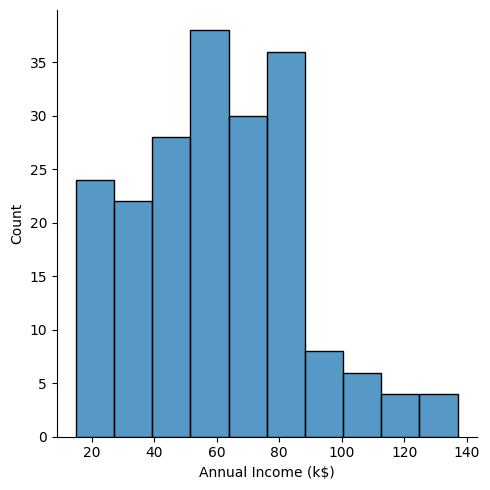

In [5]:
sns.displot(data['Annual Income (k$)'])

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

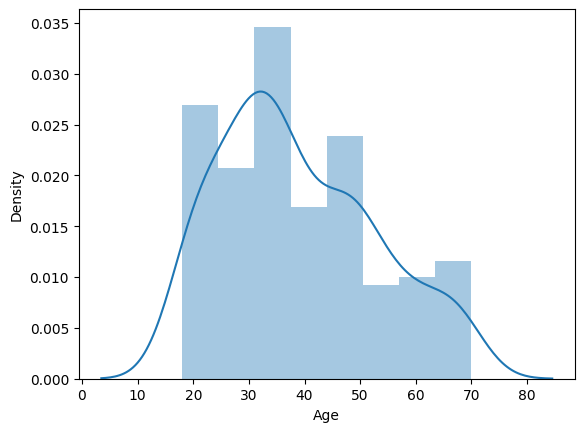

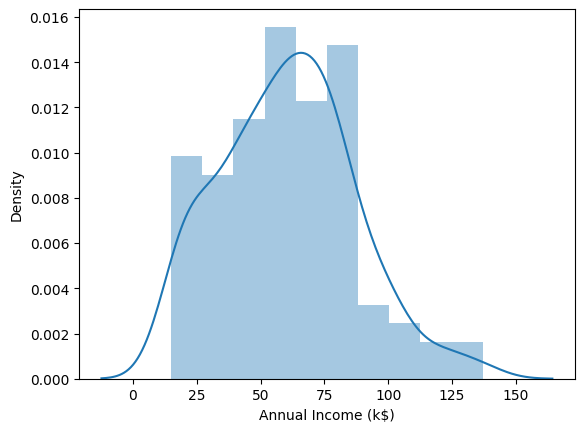

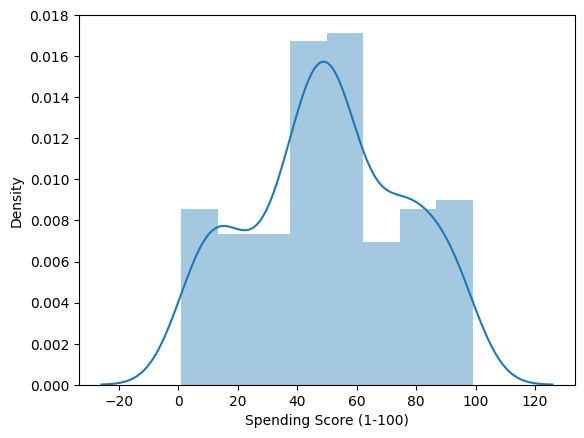

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i]) 

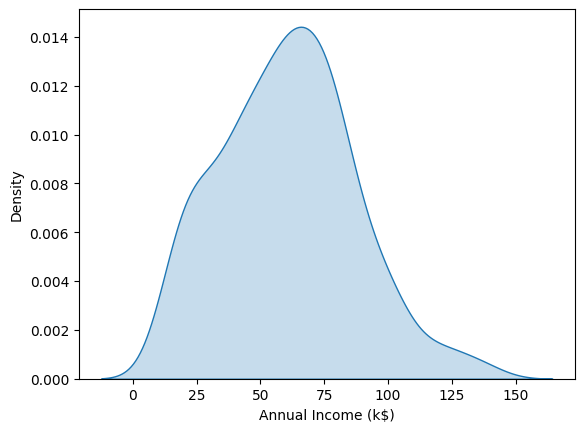

In [8]:
 sns.kdeplot(data['Annual Income (k$)'], shade=True,);

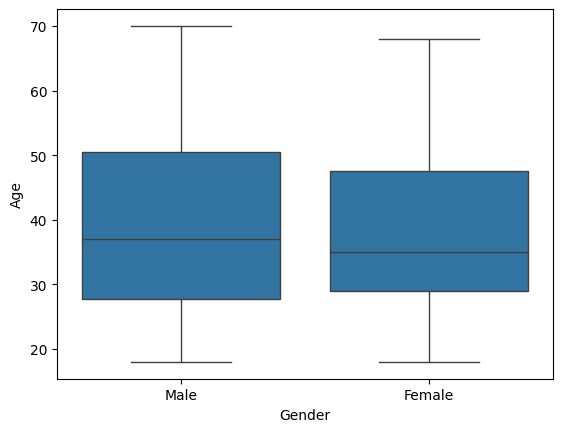

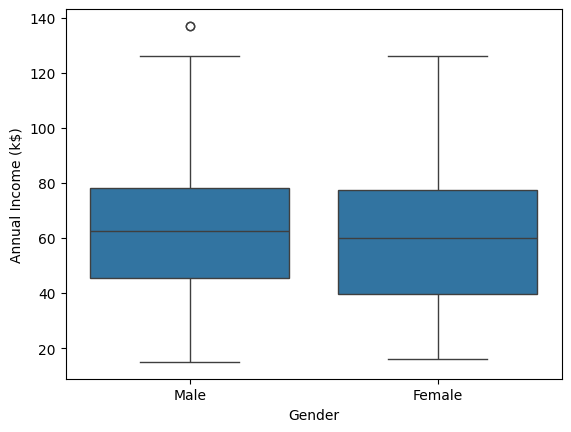

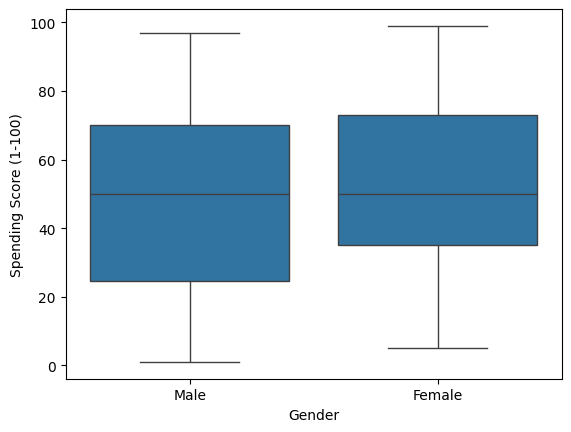

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=data,x='Gender',y=data[i])

In [10]:
data['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

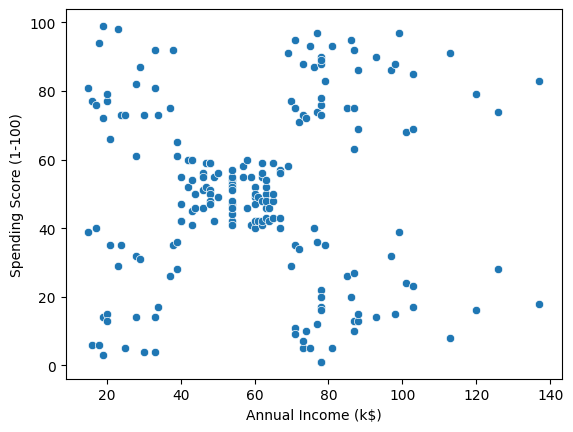

In [11]:
sns.scatterplot(data=data,x='Annual Income (k$)',y= 'Spending Score (1-100)')

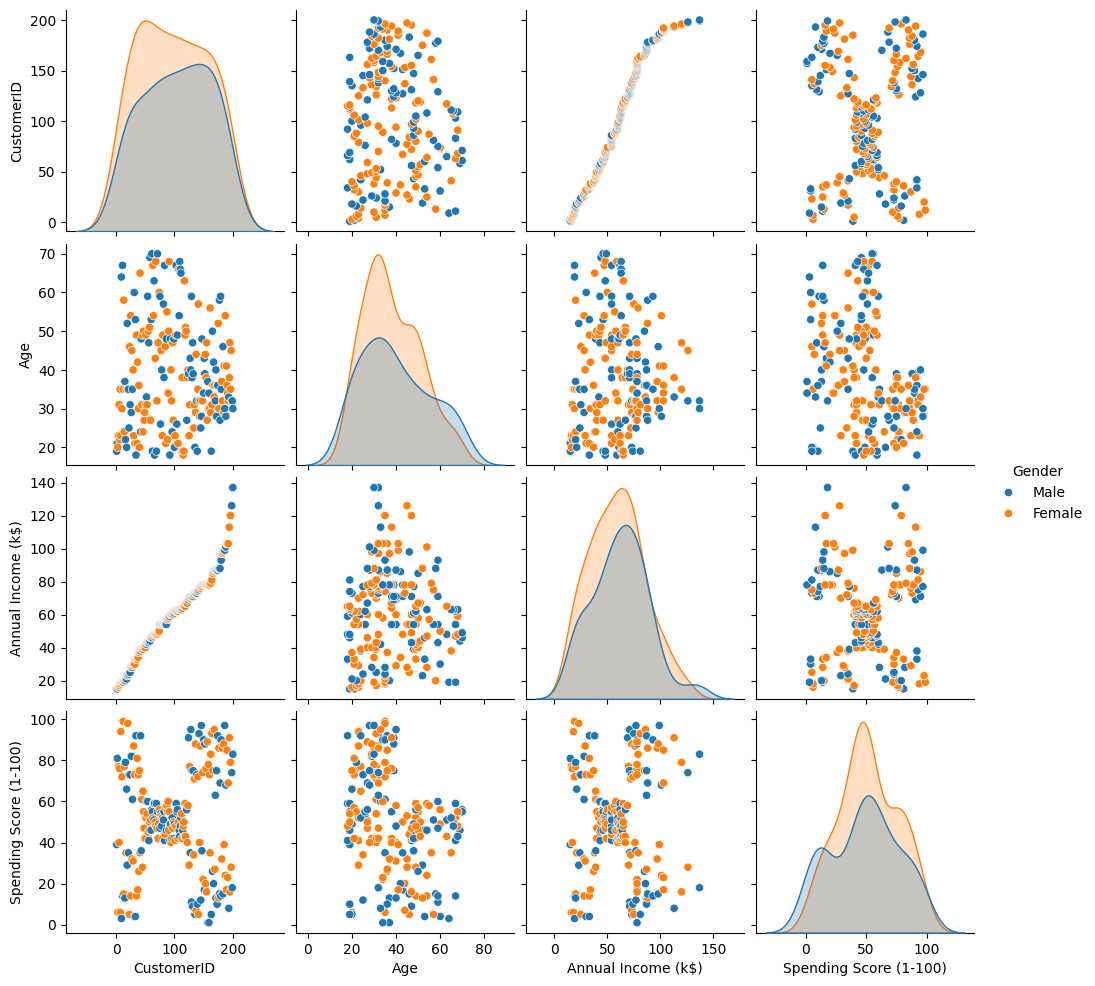

In [12]:
# data.drop('CustomerID',axis=1)
sns.pairplot(data,hue='Gender')

# Clustering - Univariate,Bivariate,Multivariate

In [13]:
clustering1 = KMeans(n_clusters=3)

In [14]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [15]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [16]:
data['Income Cluster'] = clustering1.labels_

In [17]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [18]:
data['Income Cluster'].value_counts()

Income Cluster
1    86
2    58
0    56
Name: count, dtype: int64

In [19]:
clustering1.inertia_

25640.457784396836

In [20]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [21]:
intertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913044,
 13491.067004766333,
 8481.49619047619,
 5050.904761904762,
 4002.1945773524726,
 3474.2283549783556,
 2388.188727938728,
 1950.4565601065606]

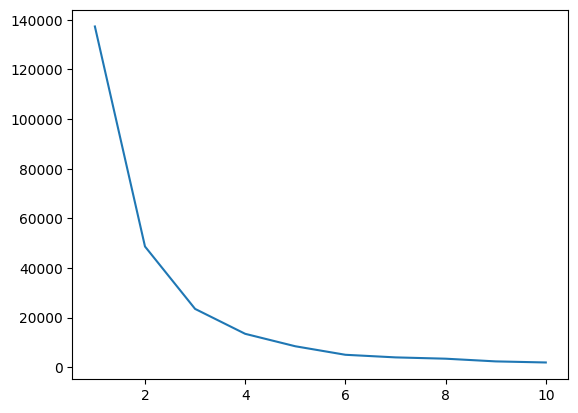

In [22]:
plt.plot(range(1,11),intertia_scores)

In [23]:
data.columns	

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [24]:
data.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()	

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


# Bivariate Clusterings

In [25]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending and Income Cluster'] =clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,3


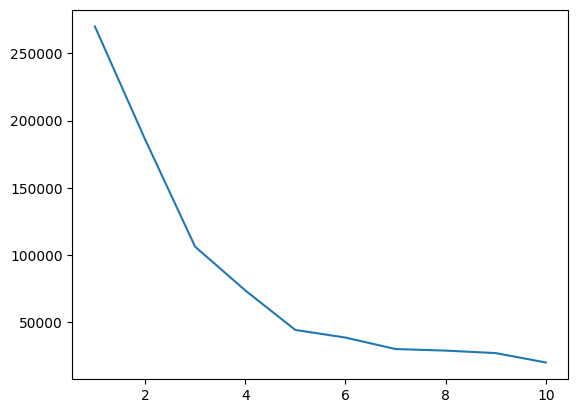

In [26]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)   

In [27]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

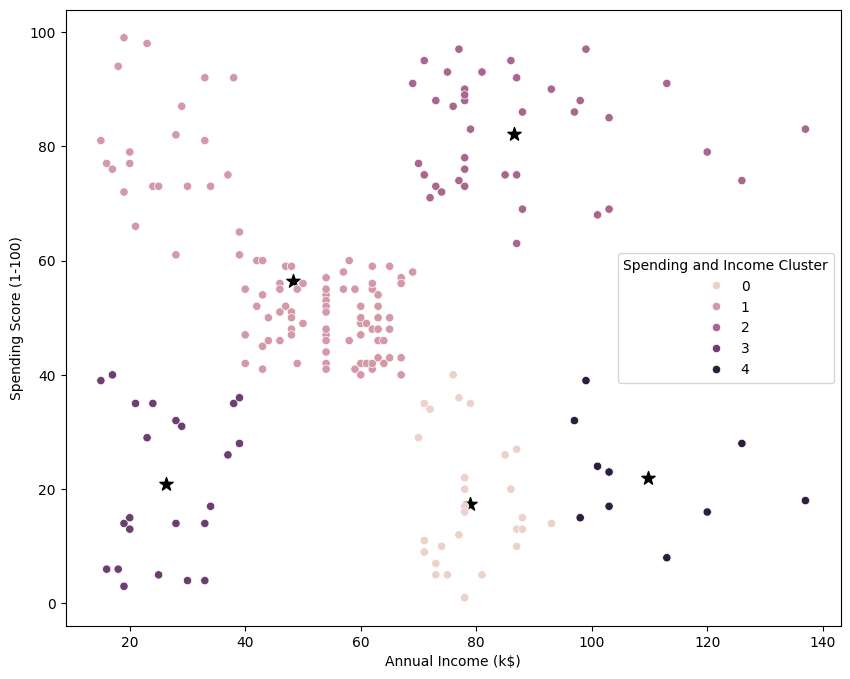

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster')
plt.savefig('clustering_bivariate.png')

In [29]:
pd.crosstab(data['Spending and Income Cluster'],data['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.392857,0.607143
1,0.590000,0.410000
2,0.538462,0.461538
3,0.608696,0.391304
4,0.700000,0.300000


In [30]:
data.groupby('Spending and Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,40.178571,78.892857,17.428571
1,39.200000,48.260000,56.480000
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.000000,109.700000,22.000000


In [31]:
# MultiVariate Clusterings
from sklearn.preprocessing import StandardScaler

In [32]:
scale = StandardScaler()

In [33]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,3


In [34]:
data['Sex']= data['Gender'].map({'Male':1,'Female':0})

In [35]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Sex
0,1,Male,19,15,39,2,3,1
1,2,Male,21,15,81,2,1,1
2,3,Female,20,16,6,2,3,0
3,4,Female,23,16,77,2,1,0
4,5,Female,31,17,40,2,3,0


In [36]:
data = data.drop('Gender',axis=1)

In [37]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Sex
0,1,19,15,39,2,3,1
1,2,21,15,81,2,1,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,1,0
4,5,31,17,40,2,3,0


In [40]:
dff = pd.get_dummies(data)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Sex
0,1,19,15,39,2,3,1
1,2,21,15,81,2,1,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,1,0
4,5,31,17,40,2,3,0


In [41]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Sex'],
      dtype='object')

In [42]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Sex']]

In [43]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [44]:
dff = scale.fit_transform(dff)


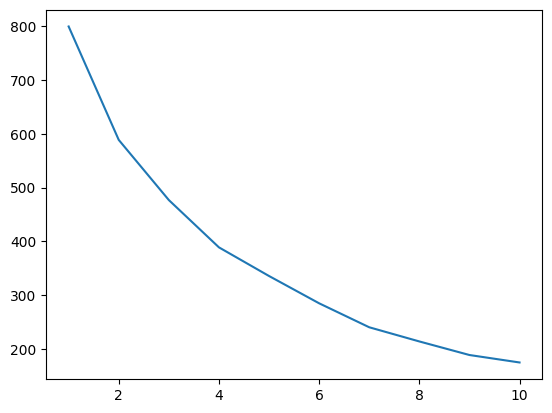

In [46]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)  

In [47]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Sex
0,1,19,15,39,2,3,1
1,2,21,15,81,2,1,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,1,0
4,5,31,17,40,2,3,0
...,...,...,...,...,...,...,...
195,196,35,120,79,0,2,0
196,197,45,126,28,0,4,0
197,198,32,126,74,0,2,1
198,199,32,137,18,0,4,1


In [49]:
data.to_csv('clustering.csv')